In [328]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import random
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
from sklearn.model_selection import train_test_split
%matplotlib inline

df = pd.read_csv('./bioresponse.csv')
df_x = df.drop('Activity', axis=1).to_numpy()
train_data, test_data, train_labels, test_labels = train_test_split(df_x, df.Activity.to_numpy(), test_size = 0.25)
df.describe()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,...,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.542255,0.076948,0.592436,0.068142,0.038990,0.212112,0.686653,0.274713,0.455133,0.749517,...,0.026926,0.014663,0.013863,0.021861,0.015196,0.016796,0.012263,0.011730,0.020261,0.011197
std,0.498278,0.079989,0.105860,0.078414,0.115885,0.102592,0.078702,0.090017,0.162731,0.071702,...,0.161889,0.120215,0.116938,0.146249,0.122348,0.128522,0.110074,0.107683,0.140911,0.105236
min,0.000000,0.000000,0.282128,0.000000,0.000000,0.002630,0.137873,0.006130,0.000000,0.275590,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.033300,0.517811,0.000000,0.000000,0.138118,0.625627,0.207374,0.378062,0.707339,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.066700,0.585989,0.050000,0.000000,0.190926,0.674037,0.277845,0.499942,0.738961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.100000,0.668395,0.100000,0.000000,0.261726,0.740663,0.335816,0.569962,0.788177,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.964381,0.950000,1.000000,1.000000,0.994735,0.790831,0.989870,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [381]:
STOCHASTIC_AMOUNT = 0.2
M_DECAY = 0.9
V_DECAY = 0.9999
EPSILON = 0.000000001

def sigmoid(z):
    s = 1./(1.+np.exp(-z))
    return s

def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0.
    
    return w, b

def propagate(w, b, X, Y):
    m = X.shape[1]
    #print('number of objects = ',len(X))
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X)+b )                            # compute activation
    cost = -(1./m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A),axis=1)   # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m)*np.dot(X,(A-Y).T)
    db = (1./m)*np.sum(A-Y,axis=1)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

def optimize_sgd(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    
    for i in range(num_iterations):
                
        # Cost and gradient calculation
        #take only a small sample and calculate within it
        stochastic_data_indexes = random.sample(range(0, X.shape[1]), int(STOCHASTIC_AMOUNT * X.shape[1]))

        grads, cost = propagate(
            w,
            b, 
            X[:,stochastic_data_indexes], 
            Y[stochastic_data_indexes]
        )
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    
    for i in range(num_iterations):
                
        # Cost and gradient calculation 
        grads, cost = propagate(w,b,X,Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -=learning_rate*dw
        b -=learning_rate*db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities 
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1
    
    return Y_prediction


In [371]:
def optimize_adam(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []

    m_w = np.zeros_like(w)
    v_w = np.zeros_like(w)

    m_b = 0.
    v_b = 0.

    for i in range(0, num_iterations):
                
        # Cost and gradient calculation 
        grads, cost = propagate(w,b,X,Y)
        
        dw = grads["dw"]
        db = grads["db"]

        m_w = M_DECAY * m_w + (1-M_DECAY) * dw
        v_w = V_DECAY * v_w + (1-V_DECAY) * dw ** 2

        m_b = M_DECAY * m_b + (1-M_DECAY) * db
        v_b = V_DECAY * v_b + (1-V_DECAY) * db ** 2

        m_w_corr = m_w / (1-M_DECAY ** (i+1))
        v_w_corr = v_w / (1-V_DECAY ** (i+1))

        m_b_corr = m_b / (1-M_DECAY ** (i+1))
        v_b_corr = v_b / (1-V_DECAY ** (i+1))

        w -= learning_rate * m_w_corr / (np.sqrt(v_w_corr) + EPSILON)
        b -= learning_rate * m_b_corr / (np.sqrt(v_b_corr) + EPSILON)
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [356]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False, optimization_function = 'gd'):
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent
    if (optimization_function == 'sgd'):
        parameters, grads, costs = optimize_sgd(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    elif (optimization_function == 'adam'):
        parameters, grads, costs = optimize_adam(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    else:
        parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

Cost after iteration 1000: 0.267791
Cost after iteration 2000: 0.740650
Cost after iteration 3000: 0.151154
train accuracy: 92.14361891219339 %
test accuracy: 69.82942430703625 %


Text(0.5, 1.0, 'Adam algorithm')

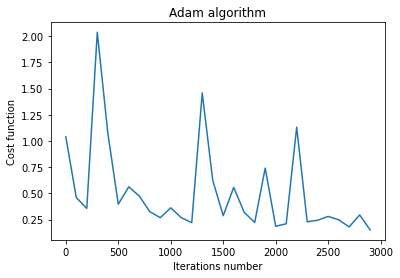

In [376]:
M_DECAY = 0.6
V_DECAY = 0.6

iter_num = 3000

d = model(train_data.T, train_labels.T, test_data.T, test_labels.T, num_iterations = iter_num, learning_rate = 0.3, print_cost = True, optimization_function='adam')

plt.plot(np.arange(0, iter_num, 100), d['costs'])
plt.xlabel('Iterations number')
plt.ylabel('Cost function')
plt.title('Adam algorithm')

Cost after iteration 0: 0.693147
Cost after iteration 1000: 0.370558
Cost after iteration 2000: 0.348064
train accuracy: 86.74013508709562 %
test accuracy: 74.52025586353945 %


Text(0.5, 1.0, 'SGD algorithm')

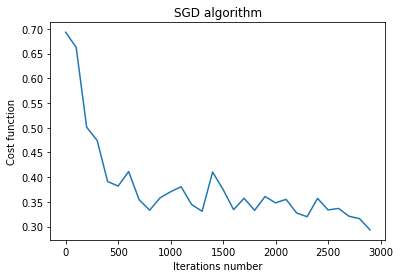

In [383]:
iter_numb = 3000
d = model(train_data.T, train_labels.T, test_data.T, test_labels.T, num_iterations = iter_numb, learning_rate = 0.3, print_cost = True, optimization_function='sgd')

plt.plot(np.arange(0, iter_numb, 100), d['costs'])
plt.xlabel('Iterations number')
plt.ylabel('Cost function')
plt.title('SGD algorithm')

Cost after iteration 0: 0.693147
Cost after iteration 1000: 0.379715
Cost after iteration 2000: 0.325111
train accuracy: 87.30892285815855 %
test accuracy: 74.09381663113007 %


Text(0.5, 1.0, 'GD algorithm')

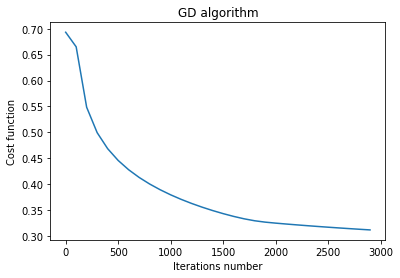

In [384]:
iter_numb = 3000
d = model(train_data.T, train_labels.T, test_data.T, test_labels.T, num_iterations = iter_numb, learning_rate = 0.3, print_cost = True, optimization_function='gd')

plt.plot(np.arange(0, iter_numb, 100), d['costs'])
plt.xlabel('Iterations number')
plt.ylabel('Cost function')
plt.title('GD algorithm')

In [388]:
LEARNING_RATES = [0.001, 0.05, 0.1, 0.2, 0.5]

iter_numb = 3000
print('---------GD ALG---------')
for l in LEARNING_RATES:
  print(f'Learning rate: {l}')
  d = model(train_data.T, train_labels.T, test_data.T, test_labels.T, num_iterations = iter_numb, learning_rate = l, print_cost = False, optimization_function='gd')

---------GD ALG---------
Learning rate: 0.001
train accuracy: 74.15570565232848 %
test accuracy: 70.8955223880597 %
Learning rate: 0.05
train accuracy: 83.93174546747245 %
test accuracy: 75.90618336886993 %
Learning rate: 0.1
train accuracy: 85.49591183789549 %
test accuracy: 75.26652452025587 %
Learning rate: 0.2
train accuracy: 86.74013508709562 %
test accuracy: 74.73347547974413 %
Learning rate: 0.5
train accuracy: 85.14041948098117 %
test accuracy: 72.38805970149254 %


In [389]:
print('---------SGD ALG---------')
for l in LEARNING_RATES:
  print(f'Learning rate: {l}')
  d = model(train_data.T, train_labels.T, test_data.T, test_labels.T, num_iterations = iter_numb, learning_rate = l, print_cost = False, optimization_function='sgd')

---------SGD ALG---------
Learning rate: 0.001
train accuracy: 74.12015641663704 %
test accuracy: 71.21535181236675 %
Learning rate: 0.05
train accuracy: 83.5407038748667 %
test accuracy: 76.11940298507463 %
Learning rate: 0.1
train accuracy: 85.35371489512976 %
test accuracy: 75.69296375266525 %
Learning rate: 0.2
train accuracy: 86.45574120156417 %
test accuracy: 74.94669509594883 %
Learning rate: 0.5
train accuracy: 85.60255954496978 %
test accuracy: 72.92110874200426 %


In [390]:

print('---------ADAM ALG---------')
for l in LEARNING_RATES:
  print(f'Learning rate: {l}')
  d = model(train_data.T, train_labels.T, test_data.T, test_labels.T, num_iterations = iter_numb, learning_rate = l, print_cost = False, optimization_function='adam')

---------ADAM ALG---------
Learning rate: 0.001
train accuracy: 91.11269107714185 %
test accuracy: 73.77398720682302 %
Learning rate: 0.05
train accuracy: 96.5161749022396 %
test accuracy: 71.32196162046908 %
Learning rate: 0.1
train accuracy: 97.12051190899396 %
test accuracy: 71.1087420042644 %
Learning rate: 0.2
train accuracy: 97.58265197298257 %
test accuracy: 70.682302771855 %
Learning rate: 0.5
train accuracy: 98.1514397440455 %
test accuracy: 70.36247334754798 %
